#### Forecasting Bike Sales Revenue

##### Import library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### Import dataset and preprocess

In [7]:
data = pd.read_csv('EuropeBikeSales.csv')
data = data[['Date', 'Revenue']]

# Group by Date và tính tổng Revenue
grouped_df = data.groupby('Date').sum().reset_index()

# Chuyển đổi cột 'Date' thành kiểu datetime với định dạng 'dd/mm/yyyy'
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'], format='%d/%m/%Y')

# Sắp xếp DataFrame theo cột 'Date'
df_sorted = grouped_df.sort_values(by='Date')

grouped_df.set_index('Date', inplace=True)

data = grouped_df.sort_index()

            Revenue
Date               
2011-01-01    12821
2011-01-02    11868
2011-01-03    31175
2011-01-04    18909
2011-01-05     4675


##### Chia dữ liệu và vẽ biểu đồ

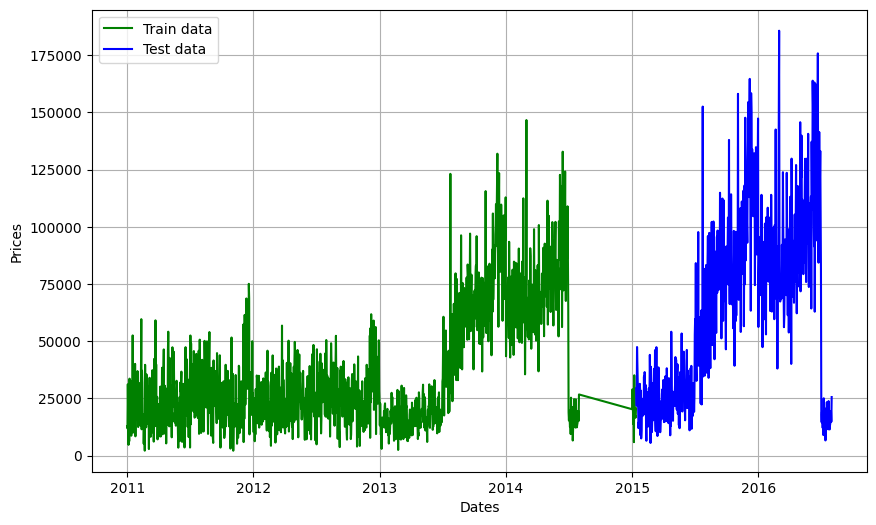

In [8]:
train_size = round(len(data) * 0.7)
test_size = round(len(data) - train_size) 

len(data), train_size, test_size
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Revenue'], 'green', label='Train data')
plt.plot(test_data['Revenue'], 'blue', label='Test data')
plt.legend()

##### Random Forest Regressor

In [14]:
model = ExponentialSmoothing(np.asarray(train_data['Revenue'])).fit()
test_data['Revenue Predicted'] = model.forecast(len(test_data))

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_4188\2049651842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Revenue Predicted'] = model.forecast(len(test_data))


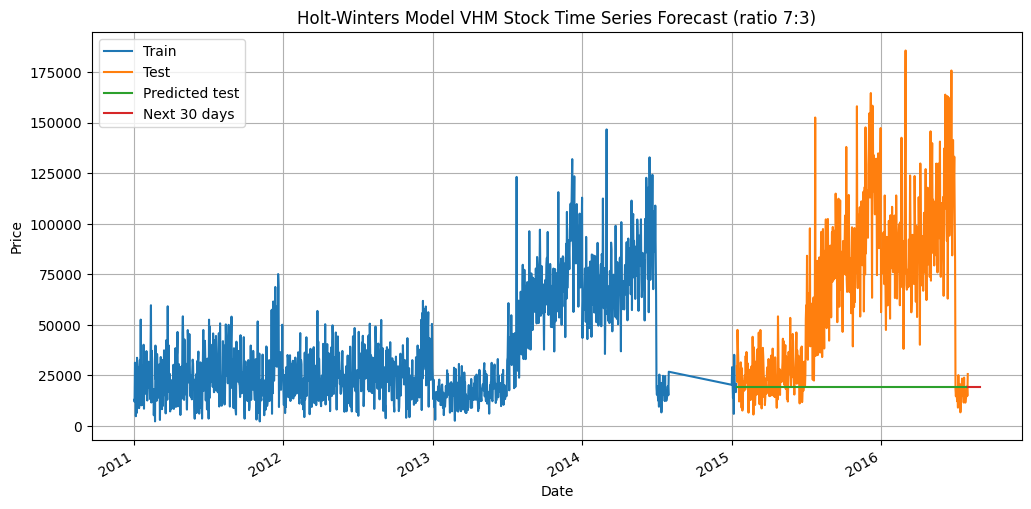

In [15]:
train_data['Revenue'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Revenue'].plot(legend=True, label='Test')
test_data['Revenue Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model Revenue Prediction for the next 30 days')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Revenue Predicted'] - test_data['Revenue'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Revenue'] - test_data['Revenue Predicted']) / test_data['Revenue'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Revenue Predicted'] - test_data['Revenue']))
print("Testing MAE:", test_mae)

Testing RMSE: 61465.446601310534
Testing MAPE: 62.10308414740644
Testing MAE: 48528.88080208311
